In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import datetime as dt
from datetime import datetime
from scipy import stats

In [2]:
Deliveries = pd.read_csv('deliveries.csv')
Matches = pd.read_csv('matches.csv')


In [3]:
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
Matches.head

<bound method NDFrame.head of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

         

In [5]:
Deliveries.shape

(260920, 17)

In [6]:
Deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [7]:
Matches.shape

(1095, 20)

In [8]:
Matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [9]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [10]:
Matches.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [11]:
Deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [12]:
Matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


1.Match Outcome Analysis

Visualize match outcomes (Win/Loss) across different years.

Analyze team performance based on historical data and seasonal trends.

In [13]:
Matches['year'] = pd.to_datetime(Matches['date']).dt.year
win_counts = Matches['winner'].value_counts().reset_index()
win_counts.columns = ['team', 'wins']

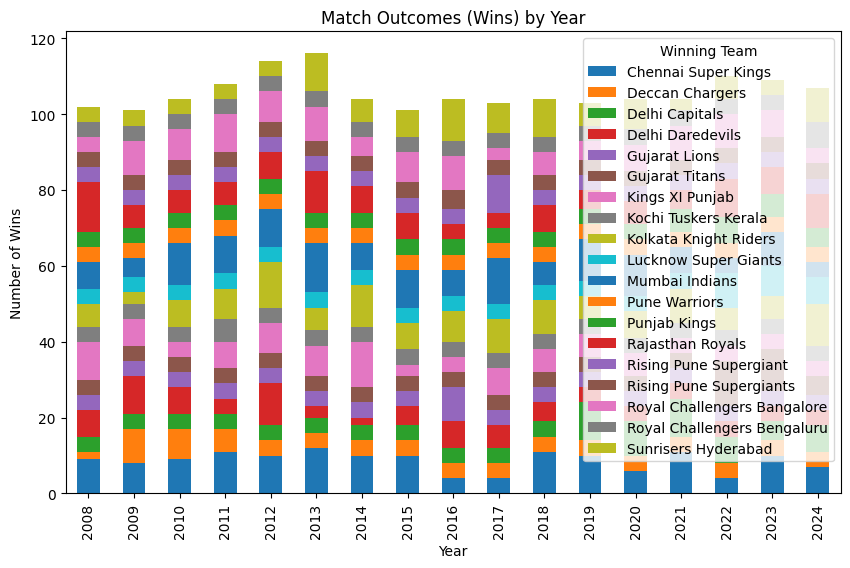

(<Figure size 1200x600 with 0 Axes>,)

<Figure size 1200x600 with 0 Axes>

In [14]:
outcomes_by_year = Matches.groupby(['year', 'winner']).size().unstack(fill_value=4)
outcomes_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Match Outcomes (Wins) by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team')
plt.show()
plt.figure(figsize=(12, 6)),


In [15]:
team_performance = Matches['winner'].value_counts().reset_index()
team_performance.columns = ['team', 'winner']
team_performance['Matches'] = Matches['team1'].value_counts() + Matches['team2'].value_counts()
team_performance['win_percentage'] = (team_performance['winner'] / team_performance['Matches']) * 100


<Figure size 2000x1200 with 0 Axes>

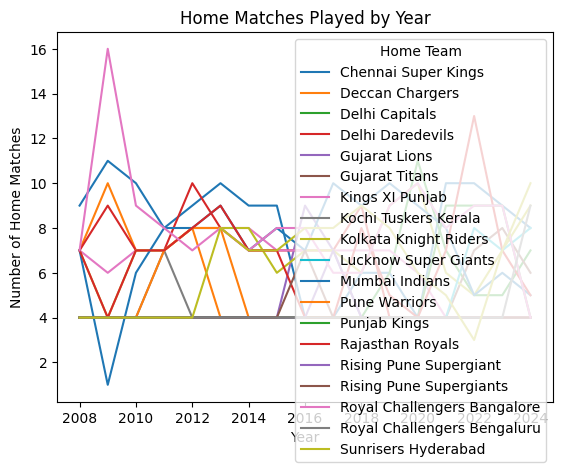

In [16]:
home_away = Matches.groupby(['year', 'team1']).size().unstack(fill_value=4)
plt.figure(figsize=(20, 12))
home_away.plot(kind='line')
plt.title('Home Matches Played by Year')
plt.xlabel('Year')
plt.ylabel('Number of Home Matches')
plt.legend(title='Home Team')
plt.show()

 2. Player Performance 

Track individual player statistics like runs, wickets, and strike rates.

Use bar graphs and scatter plots to visualize player contributions.

In [17]:
# Player Performance Analysis
Deliveries= pd.read_csv('deliveries.csv')
Deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [18]:
# Batsman Statistics
batsman_stats = Deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', lambda x: x[x == x.index].count())
).reset_index()

In [19]:
batsman_stats['average'] = batsman_stats['total_runs'] / batsman_stats['dismissals']
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Top 10 Batsmen by Runs
top_batsmen = batsman_stats.sort_values('total_runs', ascending=False).head(10)


C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\1132554313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs', y='batter', data=top_batsmen, palette='viridis')


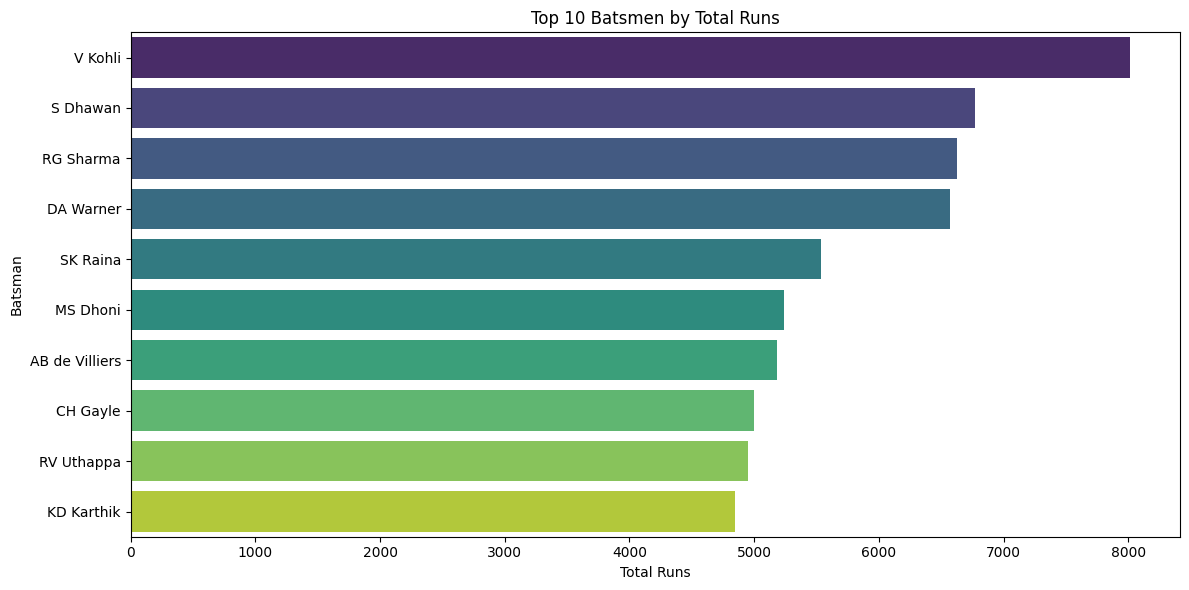

In [20]:

# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='total_runs', y='batter', data=top_batsmen, palette='viridis')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.savefig('top_batsmen.png')
plt.show()

In [21]:
# Season-wise Performance
Deliveries['match_id'] = Deliveries['match_id'].astype(str)
Matches['id'] = Matches['id'].astype(str)
merged_data = pd.merge(Deliveries, Matches[['id', 'season']], left_on='match_id', right_on='id')

season_stats = merged_data.groupby(['season', 'batter']).agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

season_stats['strike_rate'] = (season_stats['total_runs'] / season_stats['balls_faced']) * 100


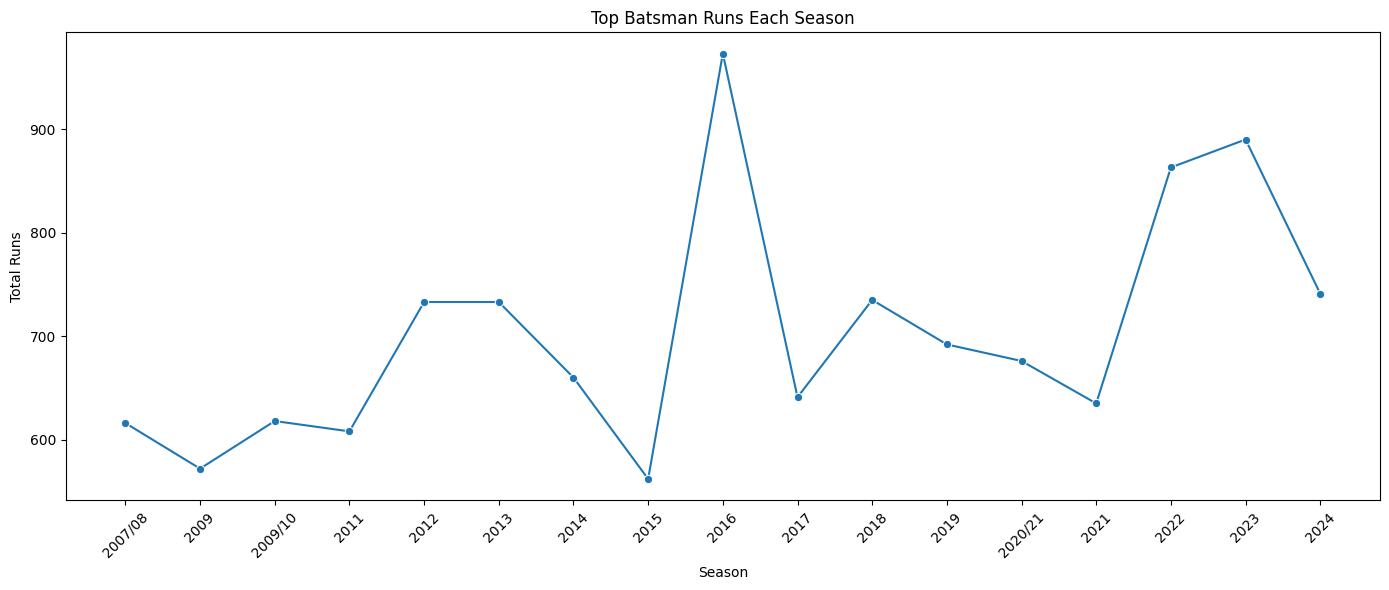

In [22]:
# Top Batsman Each Season
top_batsman_season = season_stats.loc[season_stats.groupby('season')['total_runs'].idxmax()]

plt.figure(figsize=(14, 6))
sns.lineplot(x='season', y='total_runs', data=top_batsman_season, marker='o')
plt.title('Top Batsman Runs Each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_batsman_season.png')
plt.show()

In [23]:
# Bowler Performance Analysis
bowler_stats = Deliveries.groupby('bowler').agg(
    total_runs=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets=('player_dismissed', lambda x: x[x.notnull()].count())
).reset_index()

In [24]:
bowler_stats['average'] = bowler_stats['total_runs'] / bowler_stats['wickets']
bowler_stats['economy'] = (bowler_stats['total_runs'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']


C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\4189515824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=top_bowlers, palette='magma')


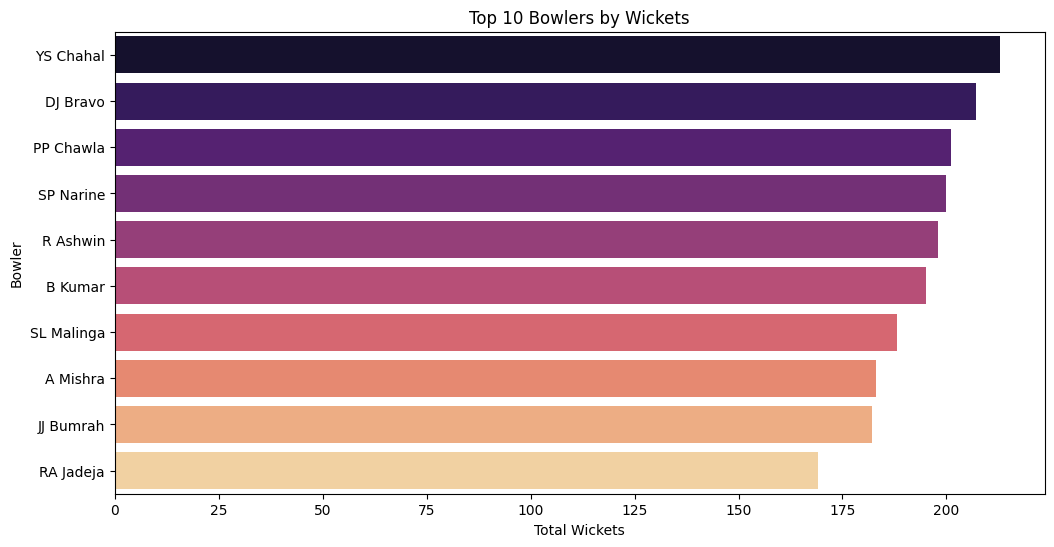

In [25]:
# Top 10 Bowlers by Wickets
top_bowlers = bowler_stats.sort_values('wickets', ascending=False).head(10)

# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=top_bowlers, palette='magma')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

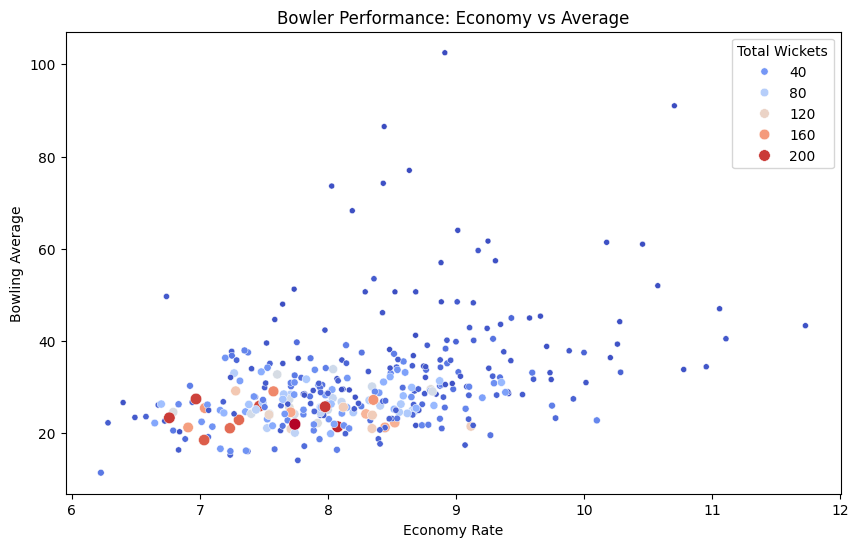

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='economy', y='average', data=bowler_stats[bowler_stats['balls_bowled'] > 100], 
                hue='wickets', size='wickets', palette='coolwarm')
plt.title('Bowler Performance: Economy vs Average')
plt.xlabel('Economy Rate')
plt.ylabel('Bowling Average')
plt.legend(title='Total Wickets')
plt.show()

In [27]:
# Season-wise Performance
Deliveries['match_id'] = Deliveries['match_id'].astype(str)
Matches['id'] = Matches['id'].astype(str)
merged_data = pd.merge(Deliveries, Matches[['id', 'season']], left_on='match_id', right_on='id')

season_bowler_stats = merged_data.groupby(['season', 'bowler']).agg(
    total_runs=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets=('player_dismissed', lambda x: x[x.notnull()].count())
).reset_index()

season_bowler_stats['economy'] = (season_bowler_stats['total_runs'] / season_bowler_stats['balls_bowled']) * 6


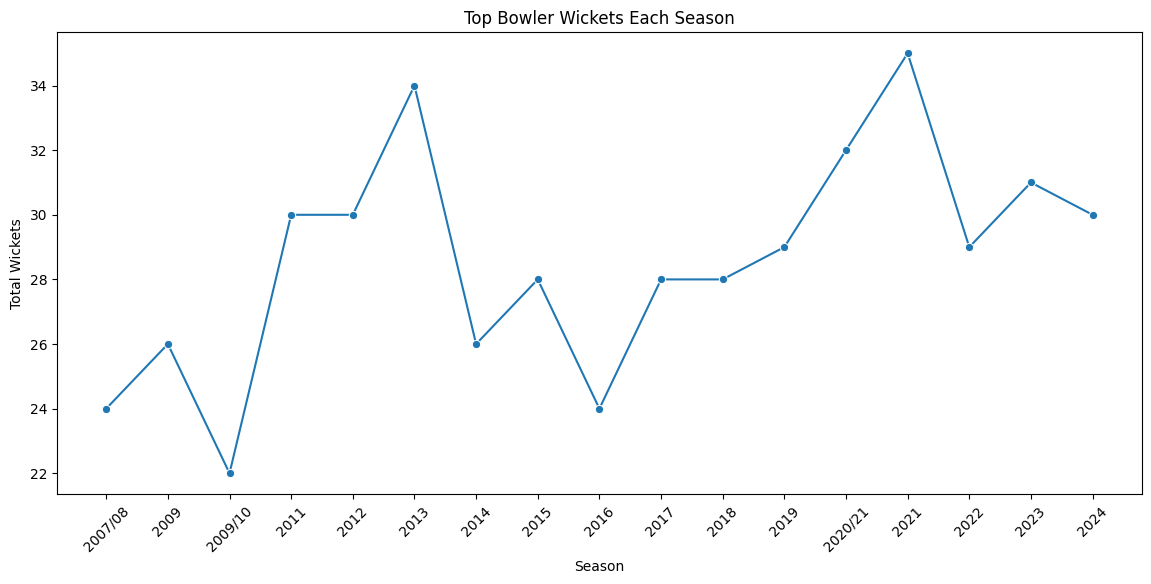

In [28]:
# Top Bowler Each Season
top_bowler_season = season_bowler_stats.loc[season_bowler_stats.groupby('season')['wickets'].idxmax()]

plt.figure(figsize=(14, 6))
sns.lineplot(x='season', y='wickets', data=top_bowler_season, marker='o')
plt.title('Top Bowler Wickets Each Season')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

3. Team Comparison

Compare team performance using line and pie charts for win percentage

Analyze the impact of team changes, including player transfers or injuries.

In [29]:
# Win Percentage Analysis
team_performance = Matches['winner'].value_counts().reset_index()
team_performance.columns = ['team', 'wins']
team_performance['matches_played'] = Matches['team1'].value_counts() + Matches['team2'].value_counts()
team_performance['win_percentage'] = (team_performance['wins'] / team_performance['matches_played']) * 100


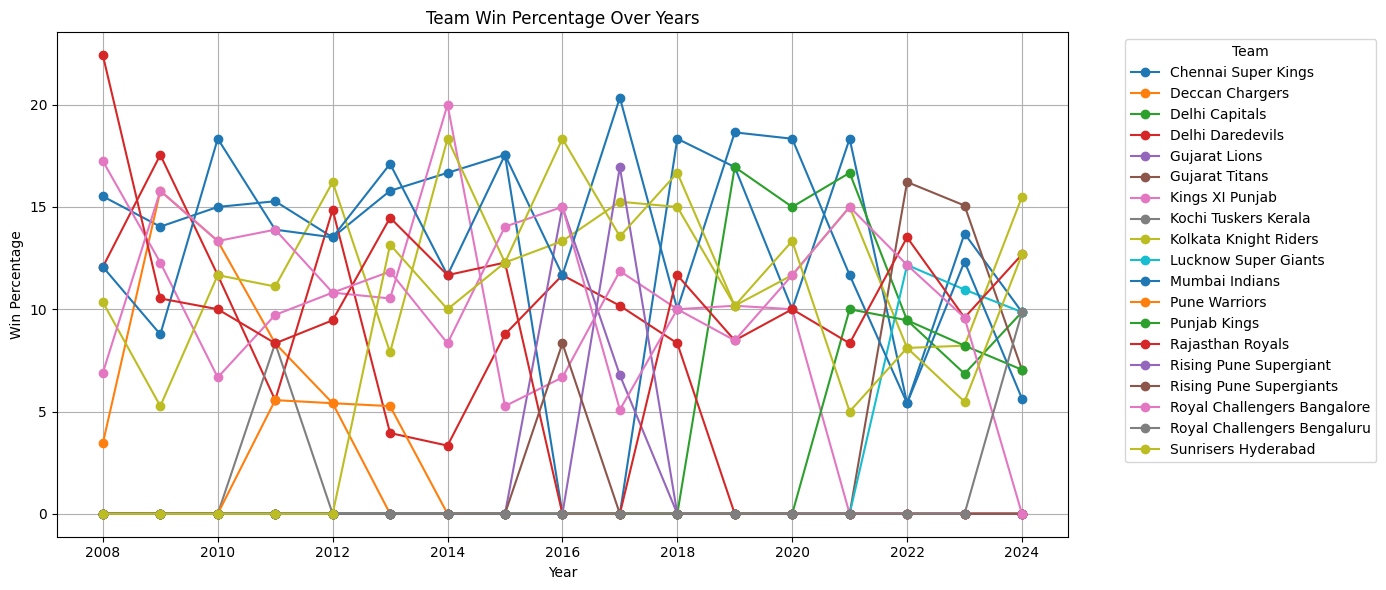

In [30]:
# Line Chart: Win Percentage Over Years
team_year_performance = Matches.groupby(['year', 'winner']).size().unstack(fill_value=0)
team_year_performance = team_year_performance.div(team_year_performance.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 6))
for team in team_year_performance.columns:
    plt.plot(team_year_performance.index, team_year_performance[team], label=team, marker='o')
plt.title('Team Win Percentage Over Years')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

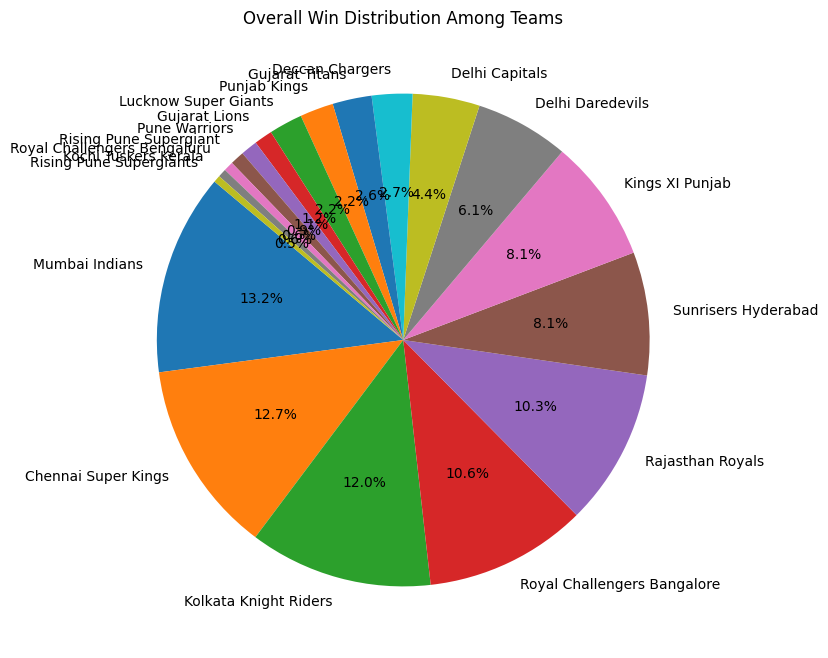

In [31]:
# Pie Chart: Overall Win Distribution
plt.figure(figsize=(8, 8))
plt.pie(team_performance['wins'], labels=team_performance['team'], autopct='%1.1f%%', startangle=140)
plt.title('Overall Win Distribution Among Teams')
plt.show()


4. Venue Performance

Evaluate match outcomes across different IPL venues

Present venue-based performance using heatmaps or bar charts.

In [32]:
# Venue Statistics
venue_stats = Matches.groupby('venue').agg(
    total_matches=('id', 'count'),
    home_wins=('winner', lambda x: (x == x.index).sum()),
    away_wins=('winner', lambda x: (x != x.index).sum())
).reset_index()


In [33]:
venue_stats['home_win_percentage'] = (venue_stats['home_wins'] / venue_stats['total_matches']) * 100
venue_stats['away_win_percentage'] = (venue_stats['away_wins'] / venue_stats['total_matches']) * 100


C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\518164389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_matches', y='venue', data=top_venues, palette='coolwarm')


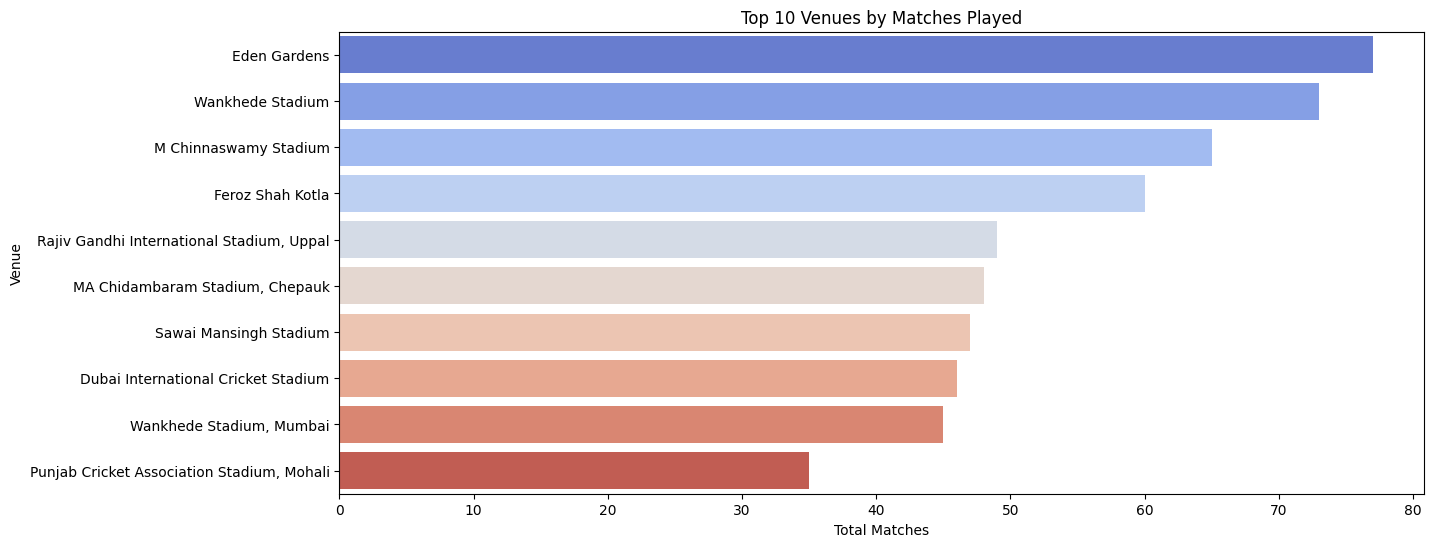

In [34]:
# Top Venues by Matches Played
top_venues = venue_stats.sort_values('total_matches', ascending=False).head(10)

# Visualizations
plt.figure(figsize=(14, 6))
sns.barplot(x='total_matches', y='venue', data=top_venues, palette='coolwarm')
plt.title('Top 10 Venues by Matches Played')
plt.xlabel('Total Matches')
plt.ylabel('Venue')
plt.show()

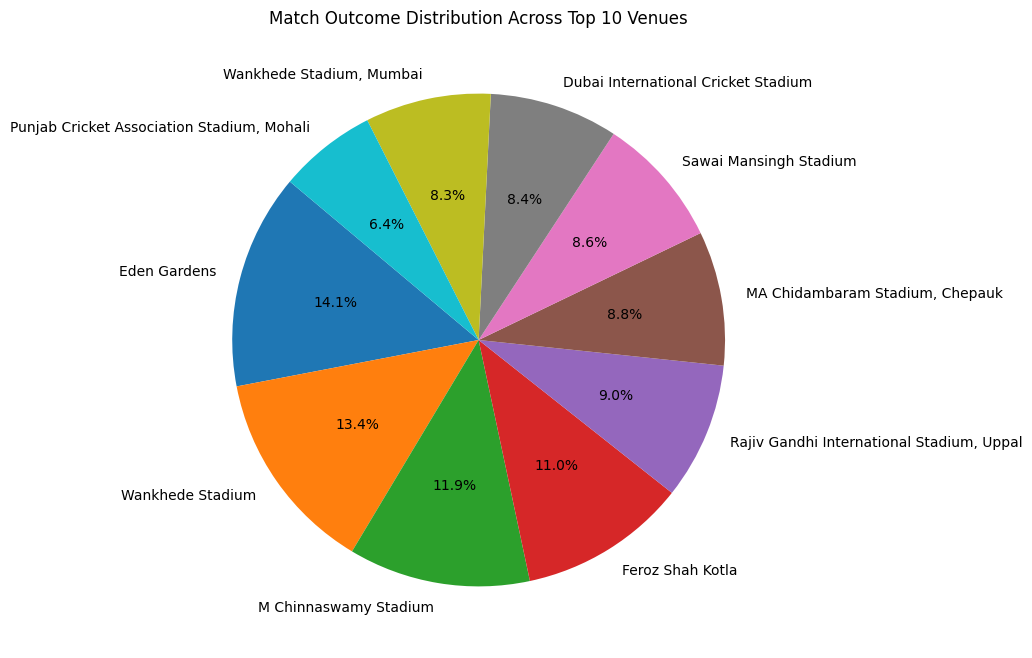

In [35]:
# Venue Outcome Distribution
plt.figure(figsize=(8, 8))
venue_outcomes = Matches['venue'].value_counts().head(10)
plt.pie(venue_outcomes, labels=venue_outcomes.index, autopct='%1.1f%%', startangle=140)
plt.title('Match Outcome Distribution Across Top 10 Venues')
plt.show()

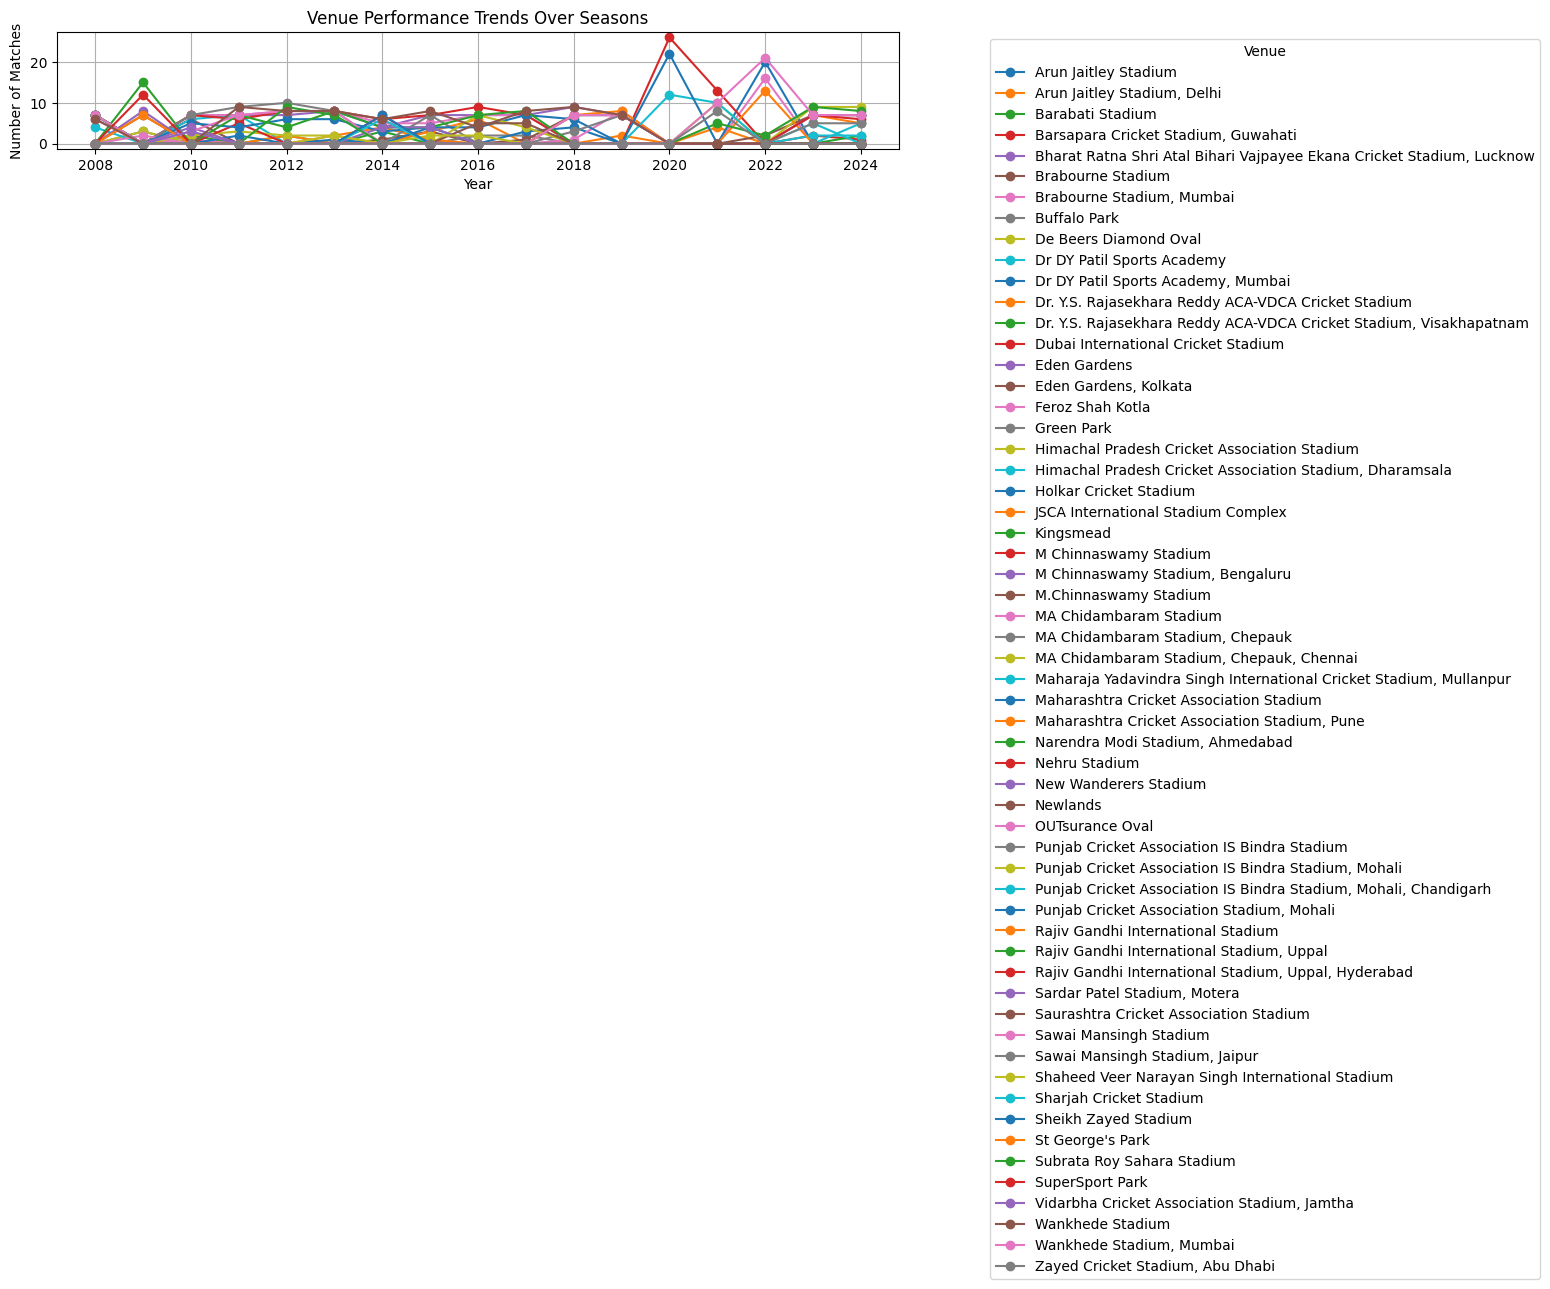

In [36]:
# Venue Performance Trends Over Seasons
venue_season = Matches.groupby(['year', 'venue']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
for venue in venue_season.columns:
    plt.plot(venue_season.index, venue_season[venue], label=venue, marker='o')
plt.title('Venue Performance Trends Over Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.legend(title='Venue', bbox_to_anchor=(1.10, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

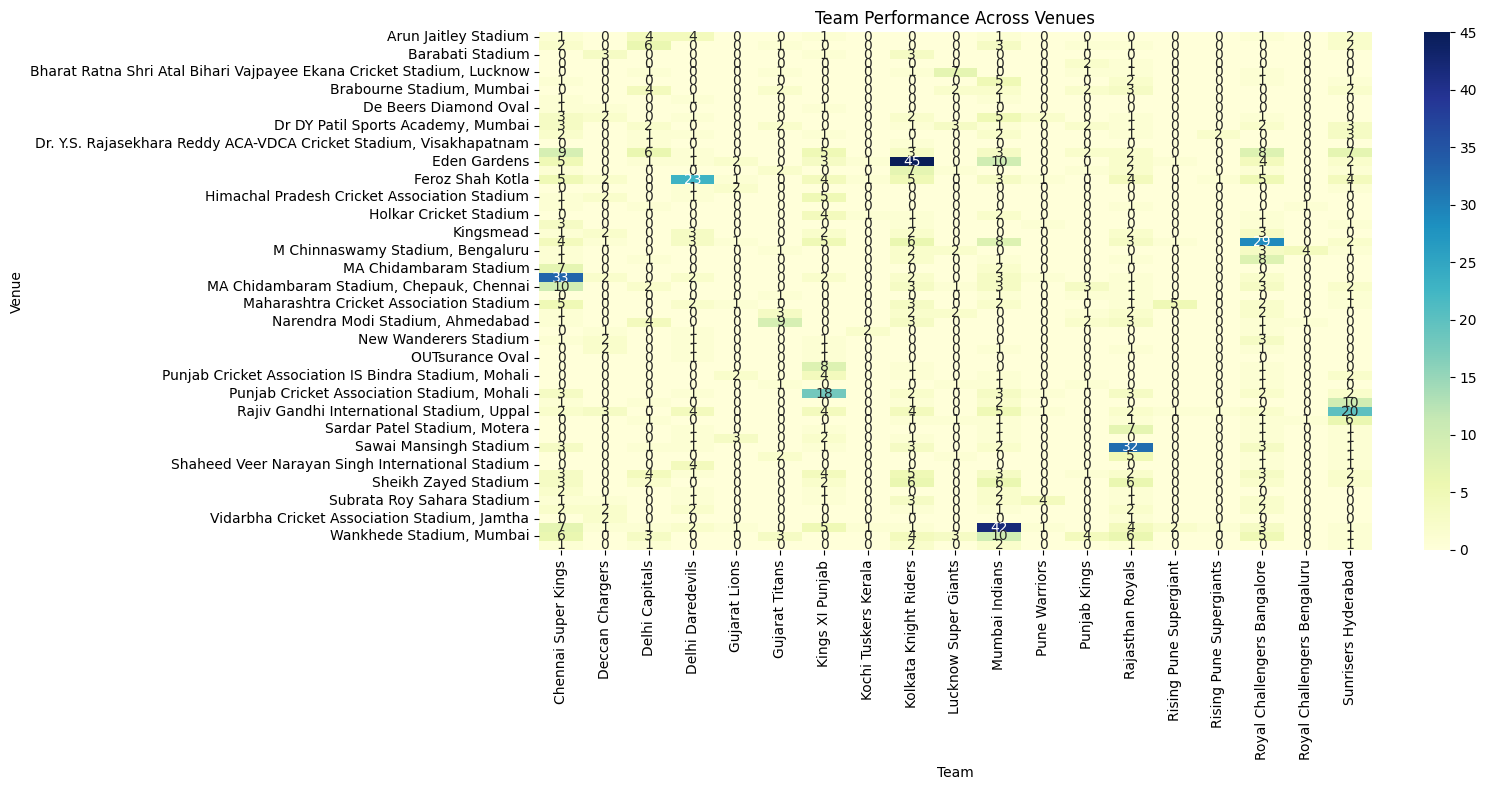

In [37]:
# Team Performance at Venues
team_venue = Matches.groupby(['venue', 'winner']).size().unstack(fill_value=0)

# Heatmap: Team Performance Across Venues
plt.figure(figsize=(16, 8))
sns.heatmap(team_venue, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Team Performance Across Venues')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\3294203278.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='coolwarm')


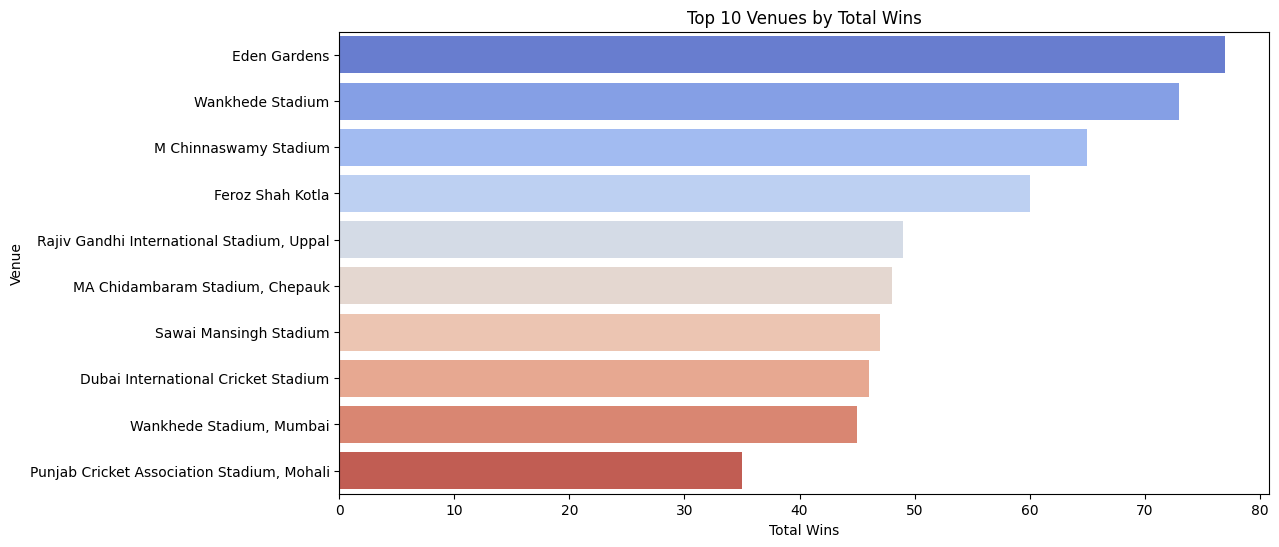

In [38]:
# Bar Chart: Top Venues by Total Wins
top_venues = Matches['venue'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='coolwarm')
plt.title('Top 10 Venues by Total Wins')
plt.xlabel('Total Wins')
plt.ylabel('Venue')
plt.show()

<Figure size 1400x600 with 0 Axes>

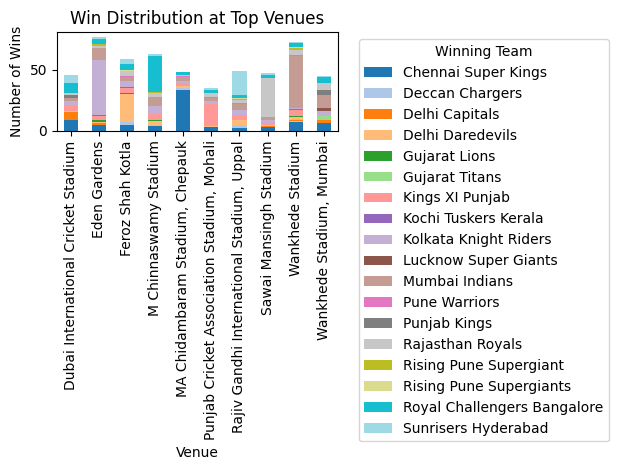

In [39]:
# Stacked Bar Chart: Win Distribution at Top Venues
top_venues_list = top_venues.index.tolist()
venue_wins = Matches[Matches['venue'].isin(top_venues_list)].groupby(['venue', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
venue_wins.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Win Distribution at Top Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

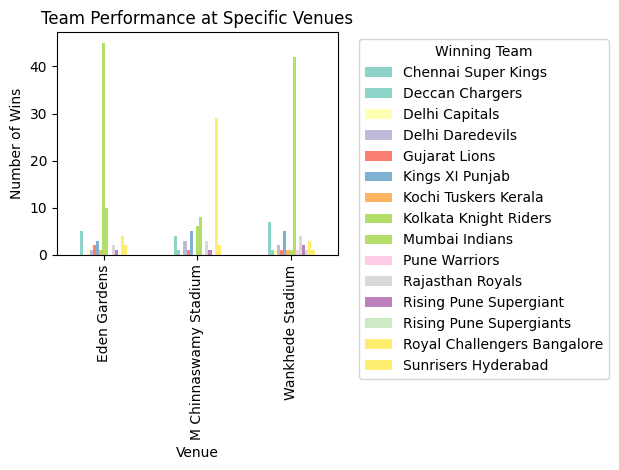

In [40]:
# Comparative Bar Chart: Team Performance at Specific Venues
specific_venues = ['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium']
team_specific_venue = Matches[Matches['venue'].isin(specific_venues)].groupby(['venue', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
team_specific_venue.plot(kind='bar', colormap='Set3')
plt.title('Team Performance at Specific Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

5.Run Rate & Scoring Analysis

Visualize average run rates for different teams and players

Use line graphs to track scoring trends over the years

In [41]:
# Average Run Rate Visualization
# Team Run Rates
team_run_rates = Deliveries.groupby('batting_team').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()
team_run_rates['run_rate'] = (team_run_rates['total_runs'] / team_run_rates['total_balls']) * 6



C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\2248148839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='run_rate', y='batting_team', data=top_teams, palette='coolwarm')


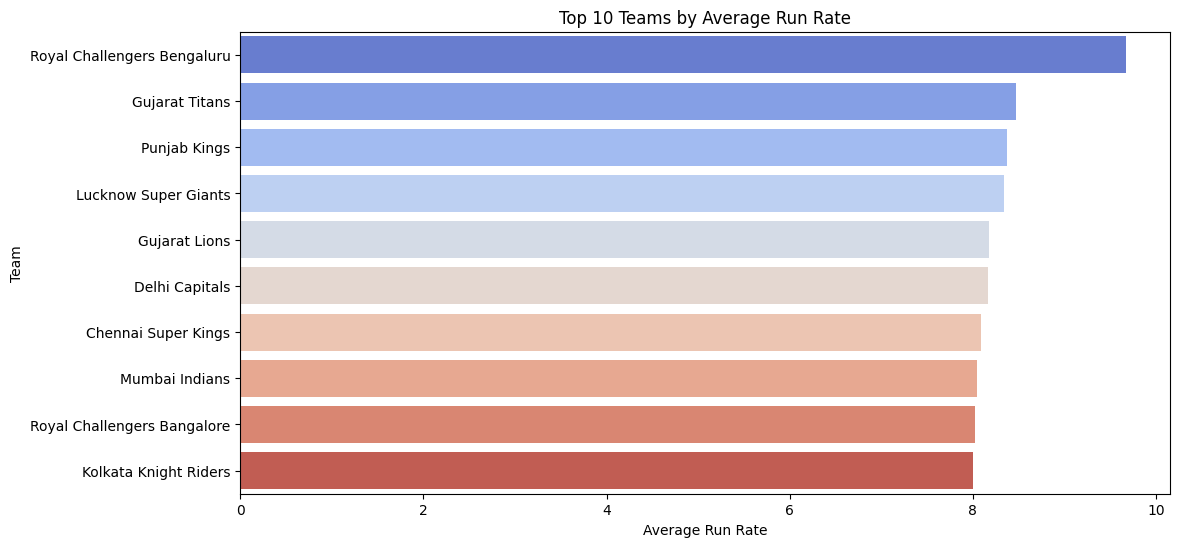

In [42]:
# Top Teams by Run Rate
top_teams = team_run_rates.sort_values('run_rate', ascending=False).head(10)

# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='run_rate', y='batting_team', data=top_teams, palette='coolwarm')
plt.title('Top 10 Teams by Average Run Rate')
plt.xlabel('Average Run Rate')
plt.ylabel('Team')
plt.show()

In [43]:
# Player Run Rates
player_run_rates = Deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

player_run_rates['run_rate'] = (player_run_rates['total_runs'] / player_run_rates['total_balls']) * 6


C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\101284064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='run_rate', y='batter', data=top_players, palette='viridis')


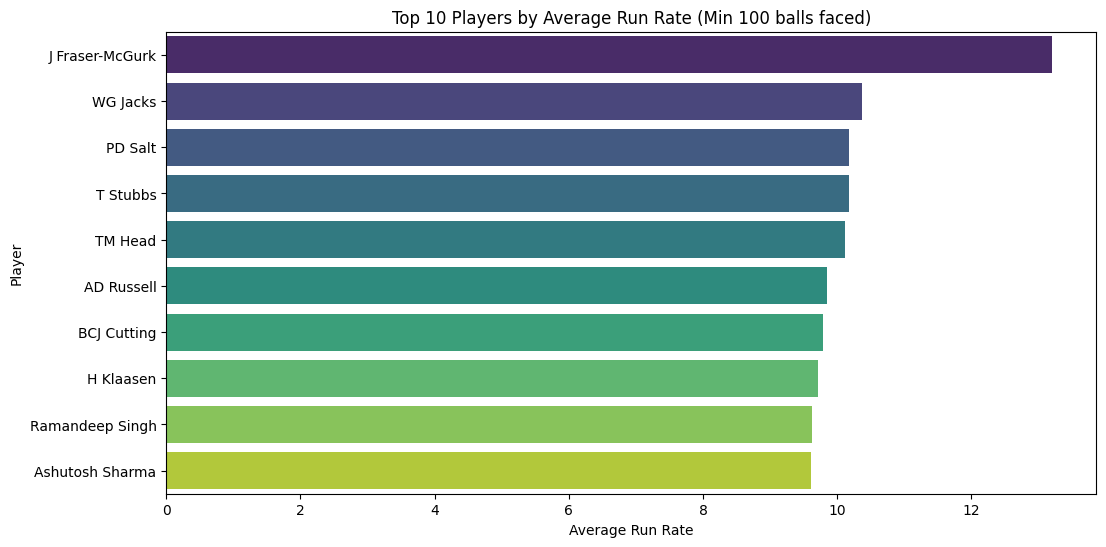

In [44]:
# Top Players by Run Rate
top_players = player_run_rates[player_run_rates['total_balls'] > 100].sort_values('run_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='run_rate', y='batter', data=top_players, palette='viridis')
plt.title('Top 10 Players by Average Run Rate (Min 100 balls faced)')
plt.xlabel('Average Run Rate')
plt.ylabel('Player')
plt.show()


In [45]:
# Run Rate Trends Over Seasons
Deliveries['match_id'] = Deliveries['match_id'].astype(str)
Matches['id'] = Matches['id'].astype(str)
merged_data = pd.merge(Deliveries, Matches[['id', 'season']], left_on='match_id', right_on='id')

season_run_rates = merged_data.groupby('season').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

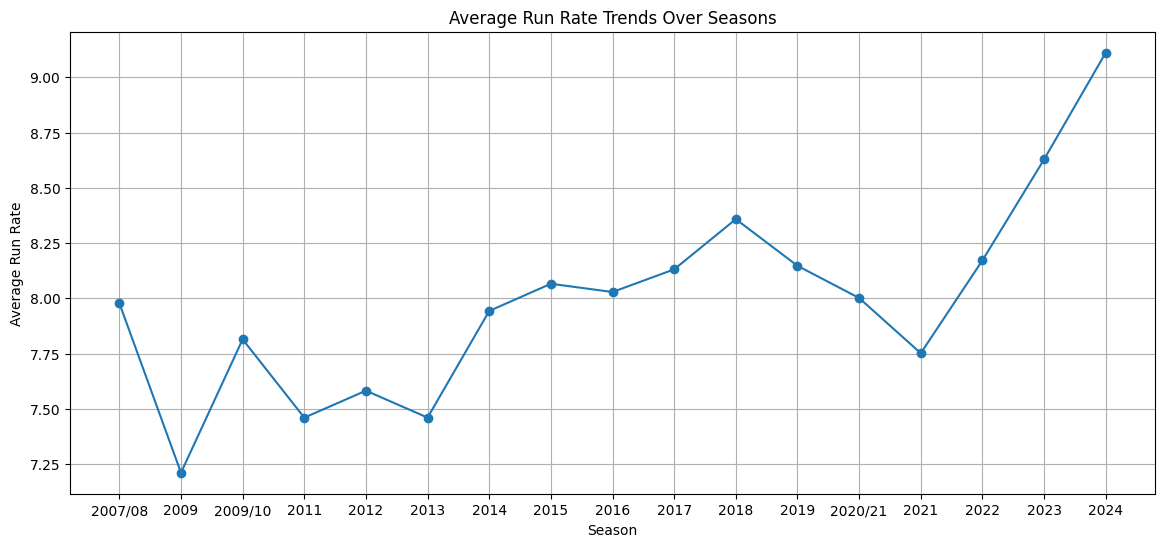

In [46]:
season_run_rates['run_rate'] = (season_run_rates['total_runs'] / season_run_rates['total_balls']) * 6

plt.figure(figsize=(14, 6))
plt.plot(season_run_rates['season'], season_run_rates['run_rate'], marker='o')
plt.title('Average Run Rate Trends Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Run Rate')
plt.grid(True)
plt.show()

In [47]:
# Scoring Trends Analysis
# Calculate total runs from Deliveries table
match_runs = Deliveries.groupby('match_id')['total_runs'].sum().reset_index()


In [48]:
# Merge with Matches table to get season information
match_runs['match_id'] = match_runs['match_id'].astype(str)
Matches['id'] = Matches['id'].astype(str)
merged_data = pd.merge(match_runs, Matches[['id', 'season']], left_on='match_id', right_on='id')


In [49]:
# Average Scores Over Seasons
season_scores = merged_data.groupby('season').agg(
    total_runs=('total_runs', 'sum'),
    total_matches=('id', 'count')
).reset_index()


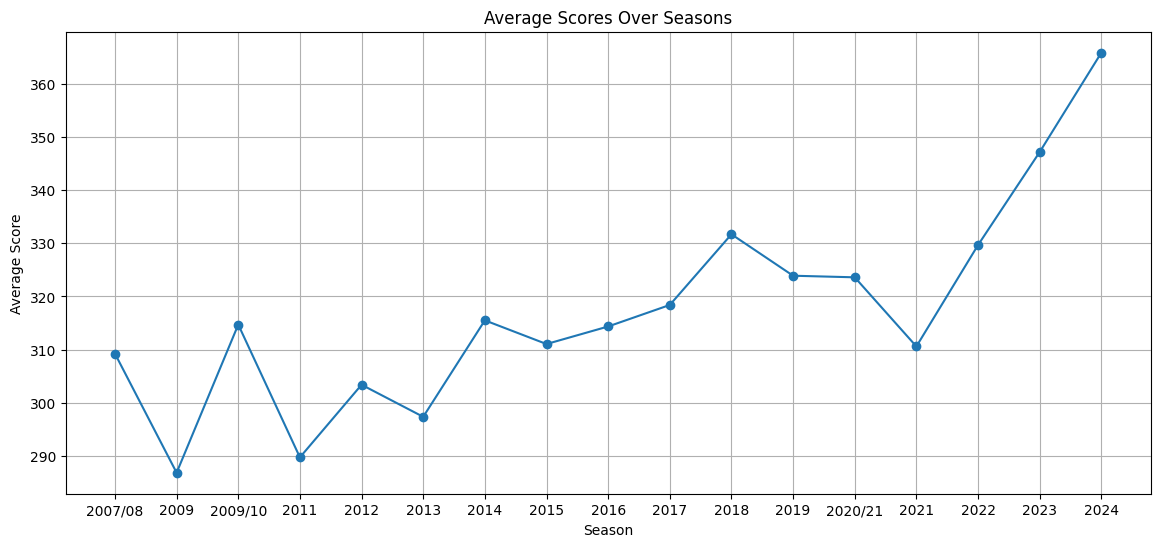

In [50]:
season_scores['average_score'] = season_scores['total_runs'] / season_scores['total_matches']

plt.figure(figsize=(14, 6))
plt.plot(season_scores['season'], season_scores['average_score'], marker='o')
plt.title('Average Scores Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

6. Best Batting Partnerships

Identify and visualize top batting pairs using histograms.

Analyze successful partnerships based on runs scored and boundary rates.

In [51]:
# Batting Partnerships Analysis
# Identify batting pairs
Deliveries['batting_pair'] = Deliveries.groupby(['match_id', 'inning'])['batter'].transform(lambda x: ','.join(sorted(x.unique())))

# Calculate partnership runs
partnerships = Deliveries.groupby(['match_id', 'inning', 'batting_pair'])['total_runs'].sum().reset_index()


C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\3886403490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs', y='batting_pair', data=top_partnerships, palette='coolwarm')


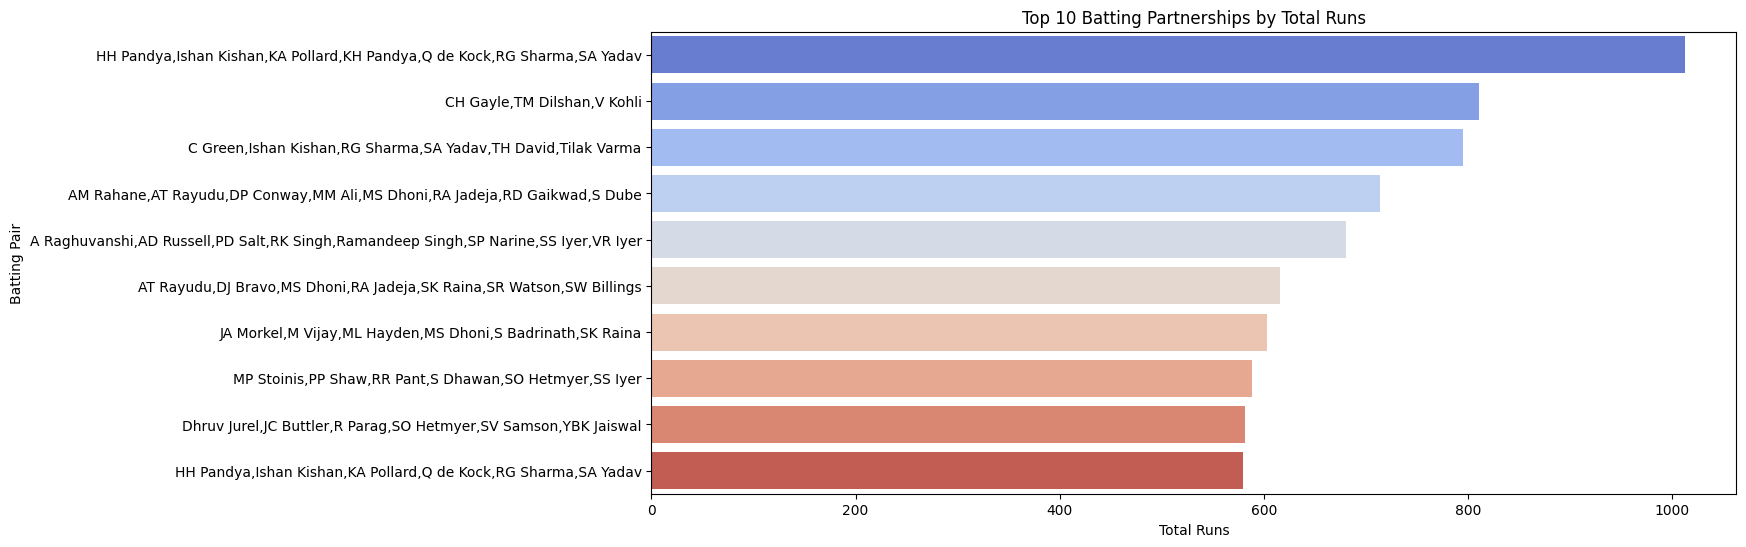

In [52]:
# Top Partnerships
top_partnerships = partnerships.groupby('batting_pair')['total_runs'].sum().reset_index()
top_partnerships = top_partnerships.sort_values('total_runs', ascending=False).head(10)

# Visualizations
plt.figure(figsize=(14, 6))
sns.barplot(x='total_runs', y='batting_pair', data=top_partnerships, palette='coolwarm')
plt.title('Top 10 Batting Partnerships by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batting Pair')
plt.show()

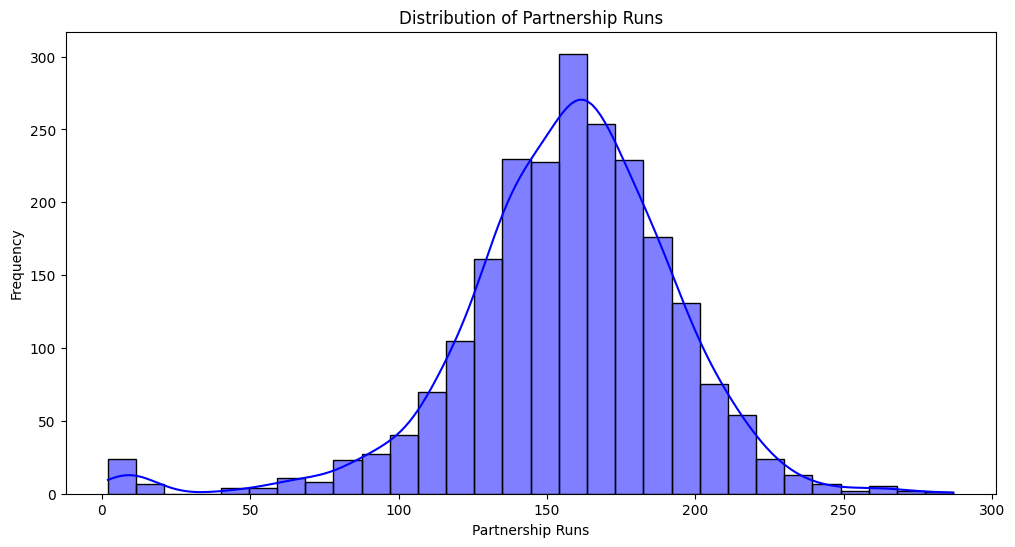

In [53]:
# Partnership Runs Distribution
plt.figure(figsize=(12, 6))
sns.histplot(partnerships['total_runs'], bins=30, kde=True, color='blue')
plt.title('Distribution of Partnership Runs')
plt.xlabel('Partnership Runs')
plt.ylabel('Frequency')
plt.show()

C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\206632291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs', y='batting_pair', data=top_match_partnerships, palette='viridis')


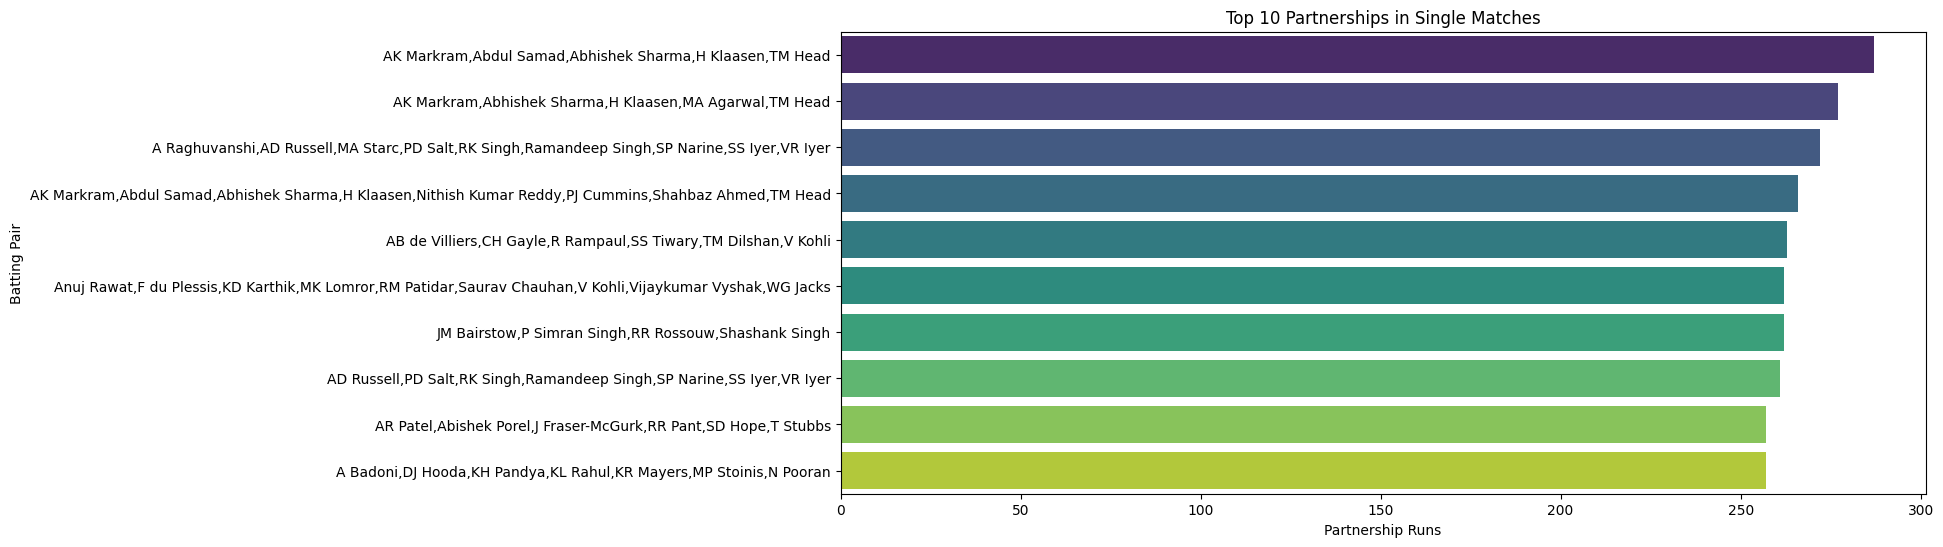

In [54]:
# Top Partnerships by Match
top_match_partnerships = partnerships.sort_values('total_runs', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x='total_runs', y='batting_pair', data=top_match_partnerships, palette='viridis')
plt.title('Top 10 Partnerships in Single Matches')
plt.xlabel('Partnership Runs')
plt.ylabel('Batting Pair')
plt.show()

In [55]:
# Enhanced Partnerships Analysis
# Identify batting pairs
Deliveries['batting_pair'] = Deliveries.groupby(['match_id', 'inning'])['batter'].transform(lambda x: ','.join(sorted(x.unique())))

# Calculate partnership statistics
partnerships = Deliveries.groupby(['match_id', 'inning', 'batting_pair']).agg(
    total_runs=('total_runs', 'sum'),
    boundaries=('batsman_runs', lambda x: x[x.isin([4, 6])].count()),
    balls_faced=('ball', 'count')
).reset_index()

In [56]:
partnerships['boundary_rate'] = (partnerships['boundaries'] / partnerships['balls_faced']) * 100
partnerships['composite_score'] = partnerships['total_runs'] * partnerships['boundary_rate']

# Top Partnerships by Composite Score
top_partnerships = partnerships.groupby('batting_pair').agg(
    total_runs=('total_runs', 'sum'),
    boundary_rate=('boundary_rate', 'mean'),
    composite_score=('composite_score', 'sum')
).reset_index()

C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\1891834590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_score', y='batting_pair', data=top_partnerships, palette='coolwarm')


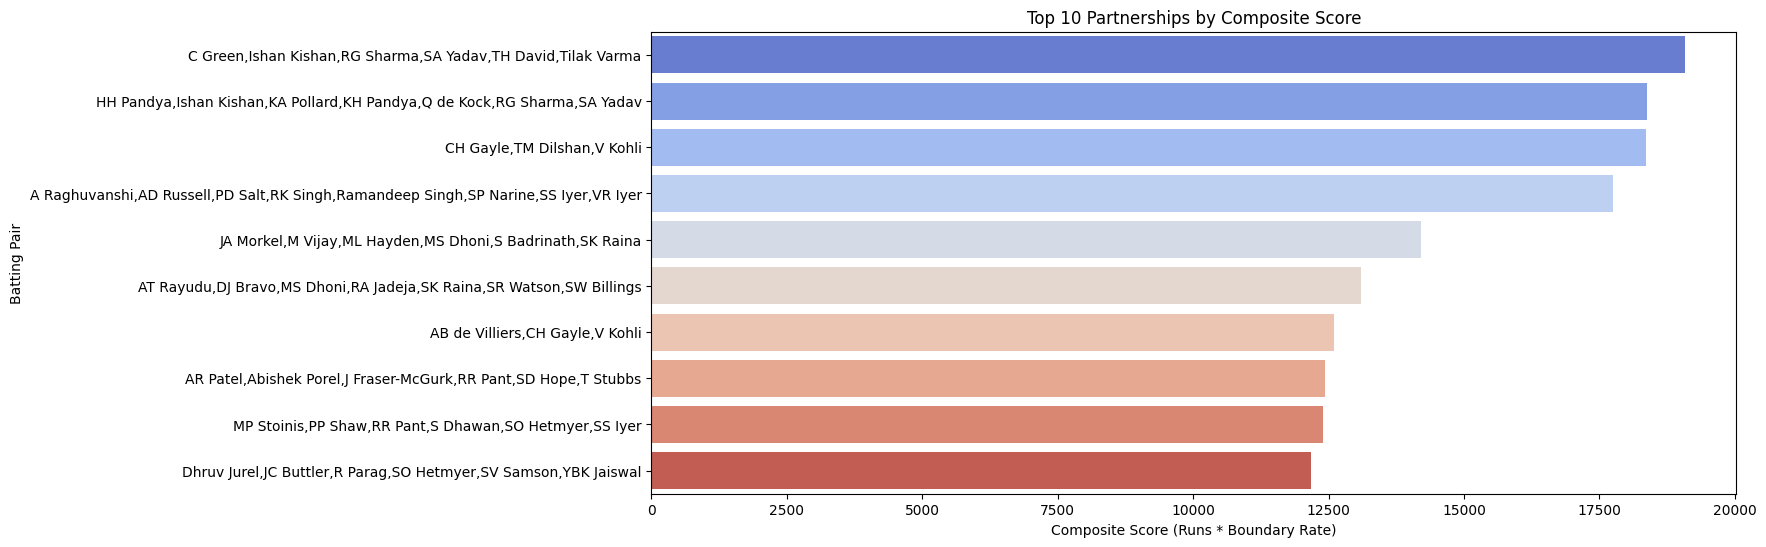

In [57]:
top_partnerships = top_partnerships.sort_values('composite_score', ascending=False).head(10)

# Visualizations
plt.figure(figsize=(14, 6))
sns.barplot(x='composite_score', y='batting_pair', data=top_partnerships, palette='coolwarm')
plt.title('Top 10 Partnerships by Composite Score')
plt.xlabel('Composite Score (Runs * Boundary Rate)')
plt.ylabel('Batting Pair')
plt.show()

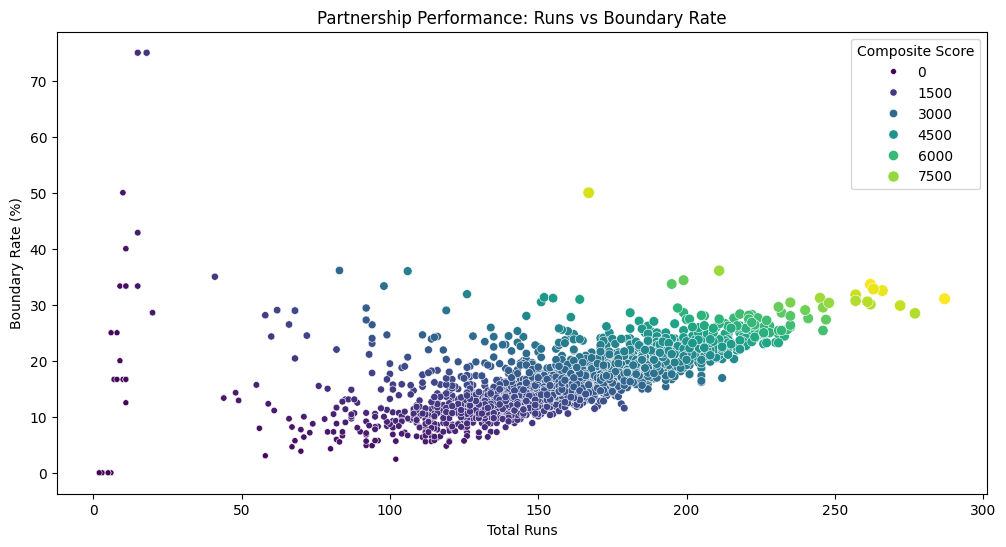

In [58]:
# Scatter Plot: Runs vs Boundary Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_runs', y='boundary_rate', data=partnerships, 
                hue='composite_score', size='composite_score', palette='viridis')
plt.title('Partnership Performance: Runs vs Boundary Rate')
plt.xlabel('Total Runs')
plt.ylabel('Boundary Rate (%)')
plt.legend(title='Composite Score')
plt.show()

C:\Users\poorn\AppData\Local\Temp\ipykernel_14316\2671918255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_score', y='batting_pair', data=top_match_partnerships, palette='viridis')


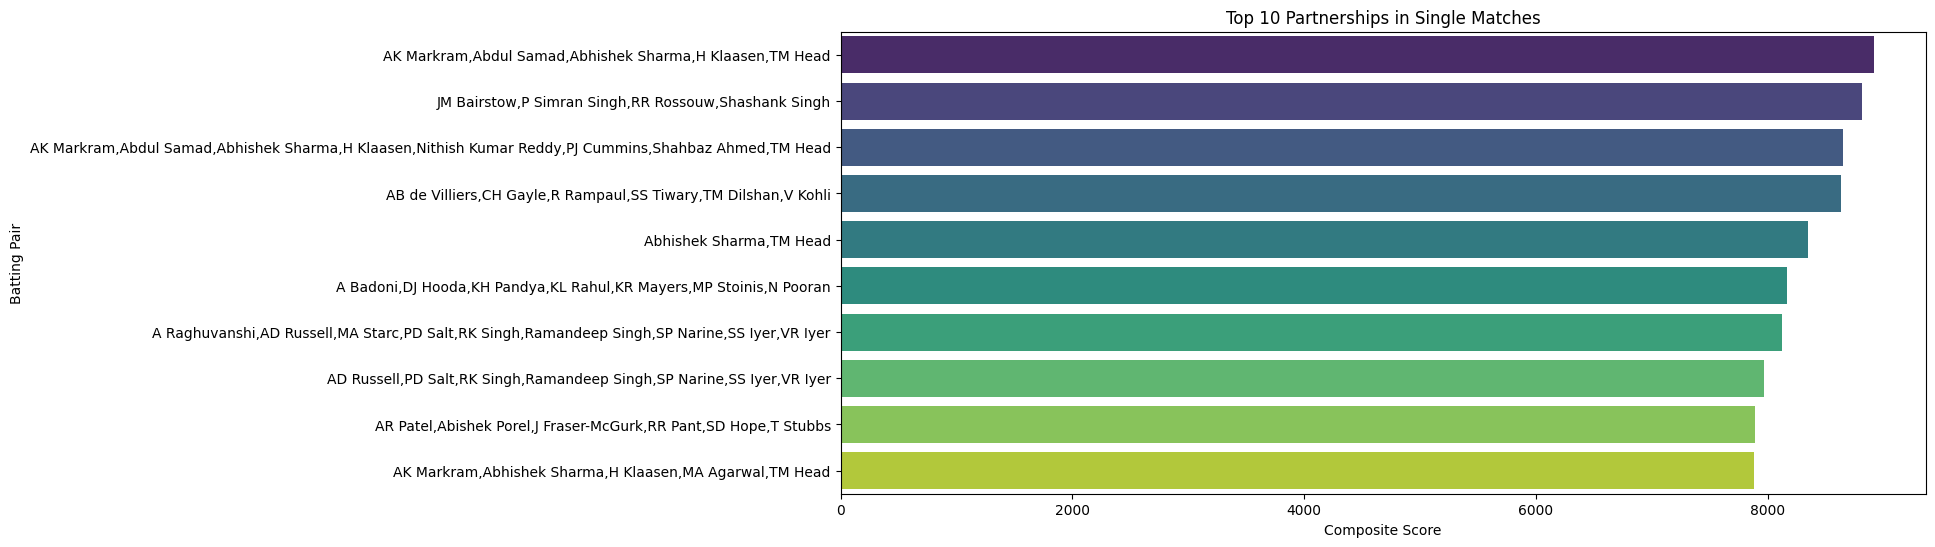

In [59]:
# Top Partnerships by Match
top_match_partnerships = partnerships.sort_values('composite_score', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x='composite_score', y='batting_pair', data=top_match_partnerships, palette='viridis')
plt.title('Top 10 Partnerships in Single Matches')
plt.xlabel('Composite Score')
plt.ylabel('Batting Pair')
plt.show()